In [26]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
import copy
from scipy import optimize as opt
import altmin_pca
from orthoDictLearning import OrthoDictLearning
from SDL_BCD import SDL_BCD

In [13]:
mot_bursts=np.load('mot_bursts.npy')
vis_bursts=np.load('vis_bursts.npy')
all_bursts=np.vstack([mot_bursts, vis_bursts])
#Create corresponding labels
y = np.hstack([np.zeros(mot_bursts.shape[0]), np.ones(vis_bursts.shape[0])])
# Shuffle data
# Save the original indices
idx = np.arange(all_bursts.shape[0])
np.random.shuffle(idx)
all_bursts = all_bursts[idx]
y = y[idx]
print(all_bursts.shape)
ncomps=20
burst_std=RobustScaler().fit_transform(all_bursts)
pca = PCA(n_components=ncomps)
pcs = pca.fit_transform(burst_std)

(808, 156)


In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# Assuming X is your features and y is your target
clf = LogisticRegressionCV(cv=5, random_state=0)

scores = cross_val_score(clf, pcs, y, cv=5)
print(np.mean(y))
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

0.5618811881188119
Cross-validation scores:  [0.5617284  0.52469136 0.5617284  0.56521739 0.53416149]
Average cross-validation score:  0.5495054060271451


0.844412179756886
CPU times: total: 15.6 ms
Wall time: 39.9 ms


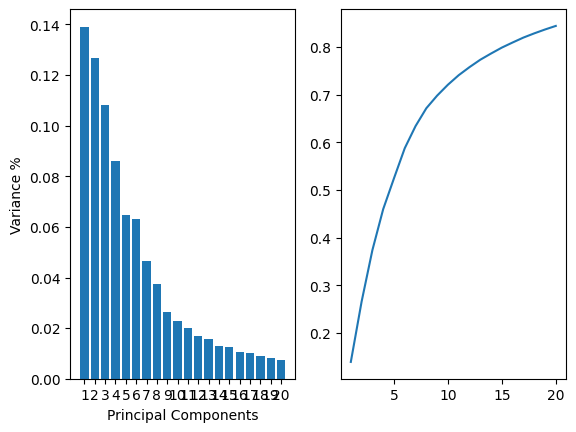

In [15]:
%%time
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.figure(facecolor='w')
plt.subplot(1,2,1)
plt.bar(PC, pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

plt.subplot(1,2,2)
plt.plot(range(1,len(PC)+1),pca.explained_variance_ratio_.cumsum())

pcs_to_analyze=20
print(pca.explained_variance_ratio_.cumsum()[ncomps-1])

In [5]:
%%time
[W,C]=altmin_pca.pca(burst_std, ncomps)

PC1: iterations=25, error=251.54425128737563
PC2: iterations=25, error=232.3273663051255
PC3: iterations=23, error=214.56672071326165
PC4: iterations=28, error=199.30721722803634
PC5: iterations=17, error=186.99409809031243
PC6: iterations=15, error=174.1370382207195
PC7: iterations=21, error=164.0153723739631
PC8: iterations=17, error=155.3914879742311
PC9: iterations=16, error=149.00797525739483
PC10: iterations=10, error=143.26214367223056
PC11: iterations=45, error=138.0384901055367
PC12: iterations=37, error=133.4670342658599
PC13: iterations=26, error=129.11024774060573
PC14: iterations=28, error=125.34319076922206
PC15: iterations=17, error=121.64046009765582
PC16: iterations=48, error=118.37399239778856
PC17: iterations=17, error=115.11188515217599
PC18: iterations=28, error=112.25693118281576
PC19: iterations=31, error=109.55387545956529
PC20: iterations=22, error=106.99627026125987
CPU times: total: 22.9 s
Wall time: 4min 37s


Text(0, 0.5, 'optimized PCA')

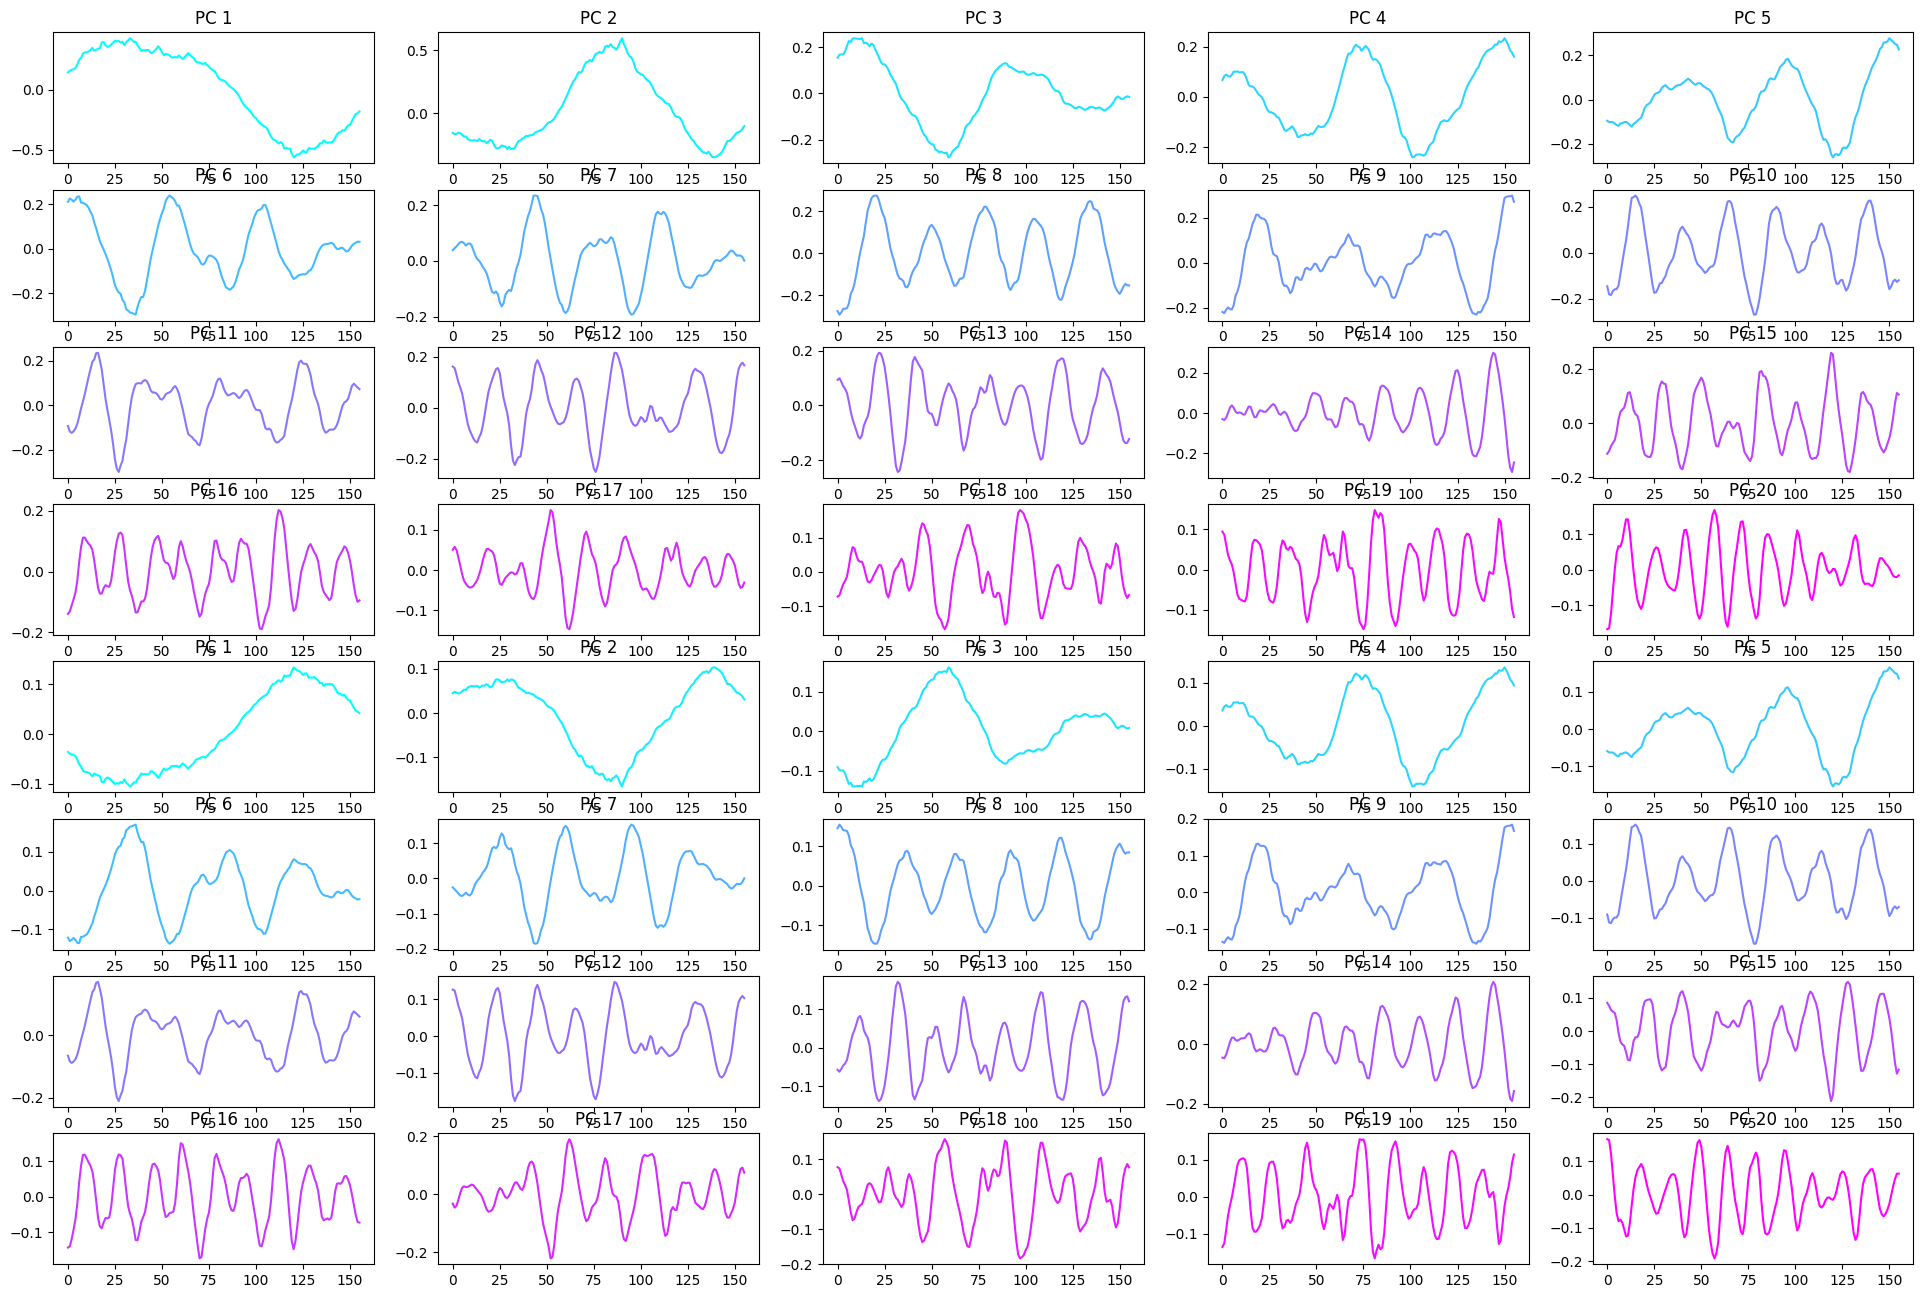

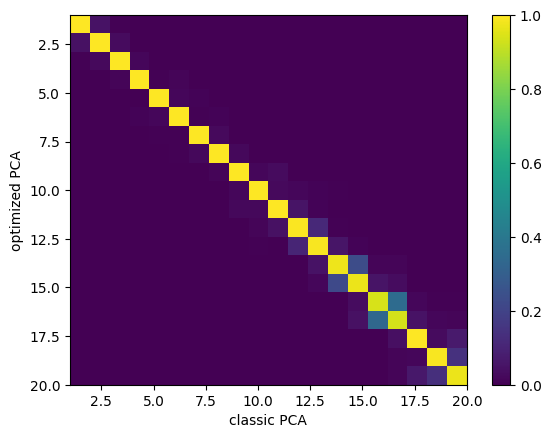

In [6]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:],C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')


In [7]:
%%time
[W,C]=altmin_pca.quadratically_regularized_pca(burst_std, ncomps, alpha=50)

PC1: iterations=12, error=256.46256550237774
PC2: iterations=34, error=242.85109023699138
PC3: iterations=31, error=231.38481073924603
PC4: iterations=17, error=222.98724780784488
PC5: iterations=59, error=217.8891844065613
PC6: iterations=14, error=212.89266687713794
PC7: iterations=26, error=210.71528314500165
PC8: iterations=49, error=210.1149505370385
PC9: iterations=12, error=210.05878312213056
PC10: iterations=7, error=210.016664066541
PC11: iterations=14, error=209.9694640610552
PC12: iterations=9, error=209.925870034723
PC13: iterations=24, error=209.8905817294023
PC14: iterations=28, error=209.85833831379736
PC15: iterations=26, error=209.81479420626766
PC16: iterations=9, error=209.7840315292913
PC17: iterations=25, error=209.7507117077378
PC18: iterations=17, error=209.71223602793657
PC19: iterations=14, error=209.6744848527782
PC20: iterations=29, error=209.63098246319046
CPU times: total: 26.8 s
Wall time: 4min 58s


Text(0, 0.5, 'optimized PCA')

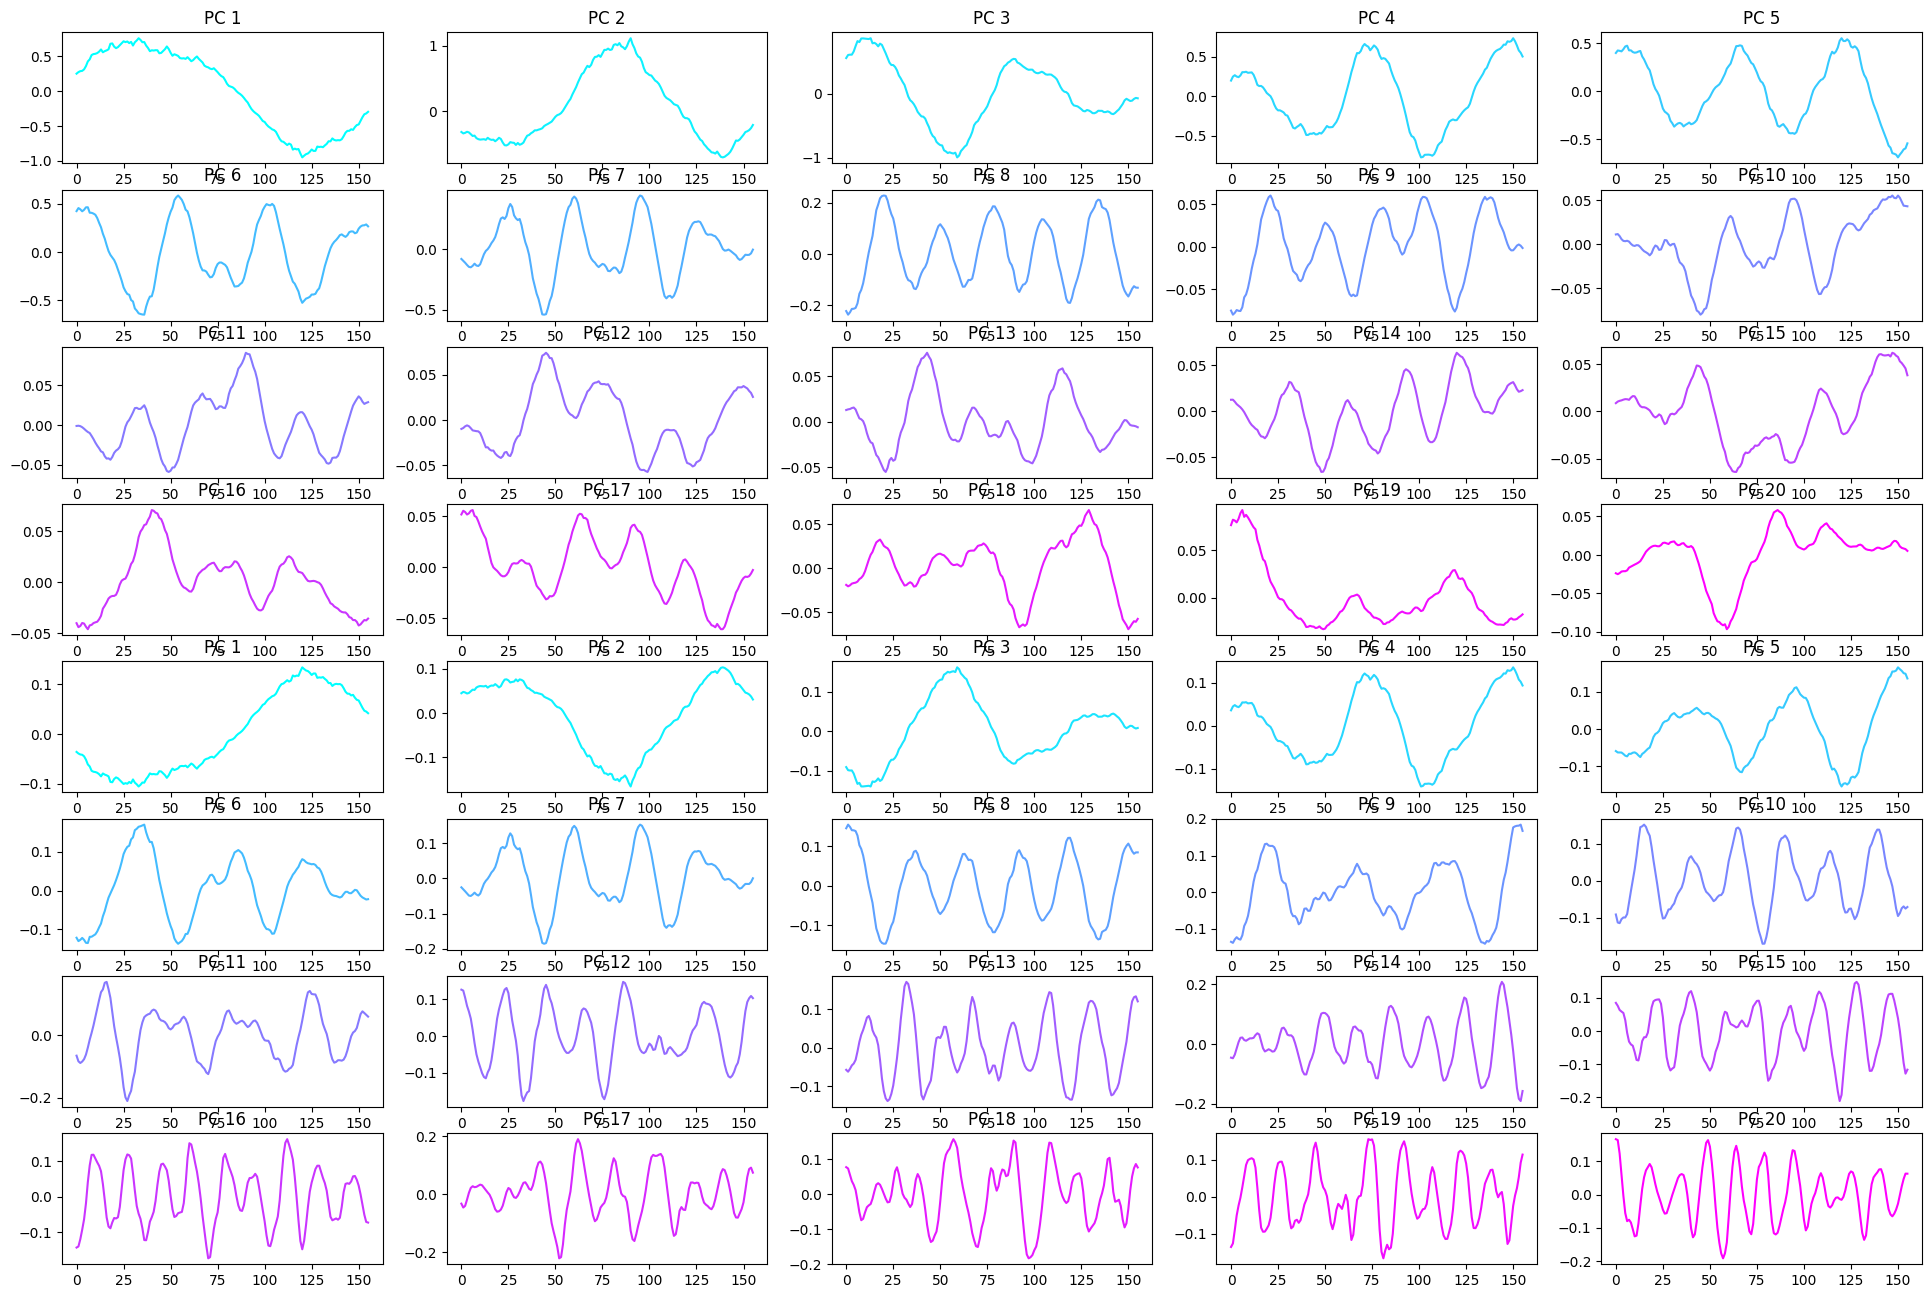

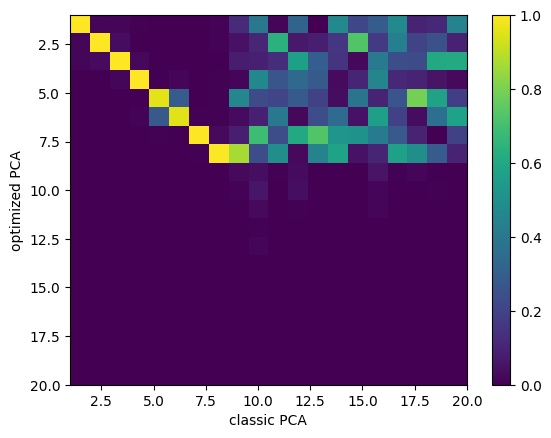

In [8]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:], C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')

In [9]:
%%time
[W,C]=altmin_pca.sparse_pca(burst_std, ncomps, alpha=20)

PC1: iterations=150, error=254.54058265819452
PC2: iterations=22, error=236.01569378477748
PC3: iterations=28, error=219.5581126166082
PC4: iterations=17, error=219.4156594428939
PC5: iterations=21, error=219.01315399143368
PC6: iterations=20, error=218.16643530057866
PC7: iterations=15, error=218.12535744826803
PC8: iterations=30, error=205.93189856213098
PC9: iterations=13, error=205.91270717604783
PC10: iterations=22, error=205.22291718641867
PC11: iterations=18, error=205.0954093815209
PC12: iterations=18, error=204.75346617437495
PC13: iterations=17, error=204.68351774921194
PC14: iterations=16, error=204.60300714841767
PC15: iterations=18, error=204.50448288005774
PC16: iterations=16, error=204.45533554953698
PC17: iterations=16, error=204.34209323186272
PC18: iterations=20, error=203.91797102731752
PC19: iterations=14, error=203.88797014339377
PC20: iterations=13, error=203.85587921860952
CPU times: total: 49.6 s
Wall time: 7min 8s


Text(0, 0.5, 'optimized PCA')

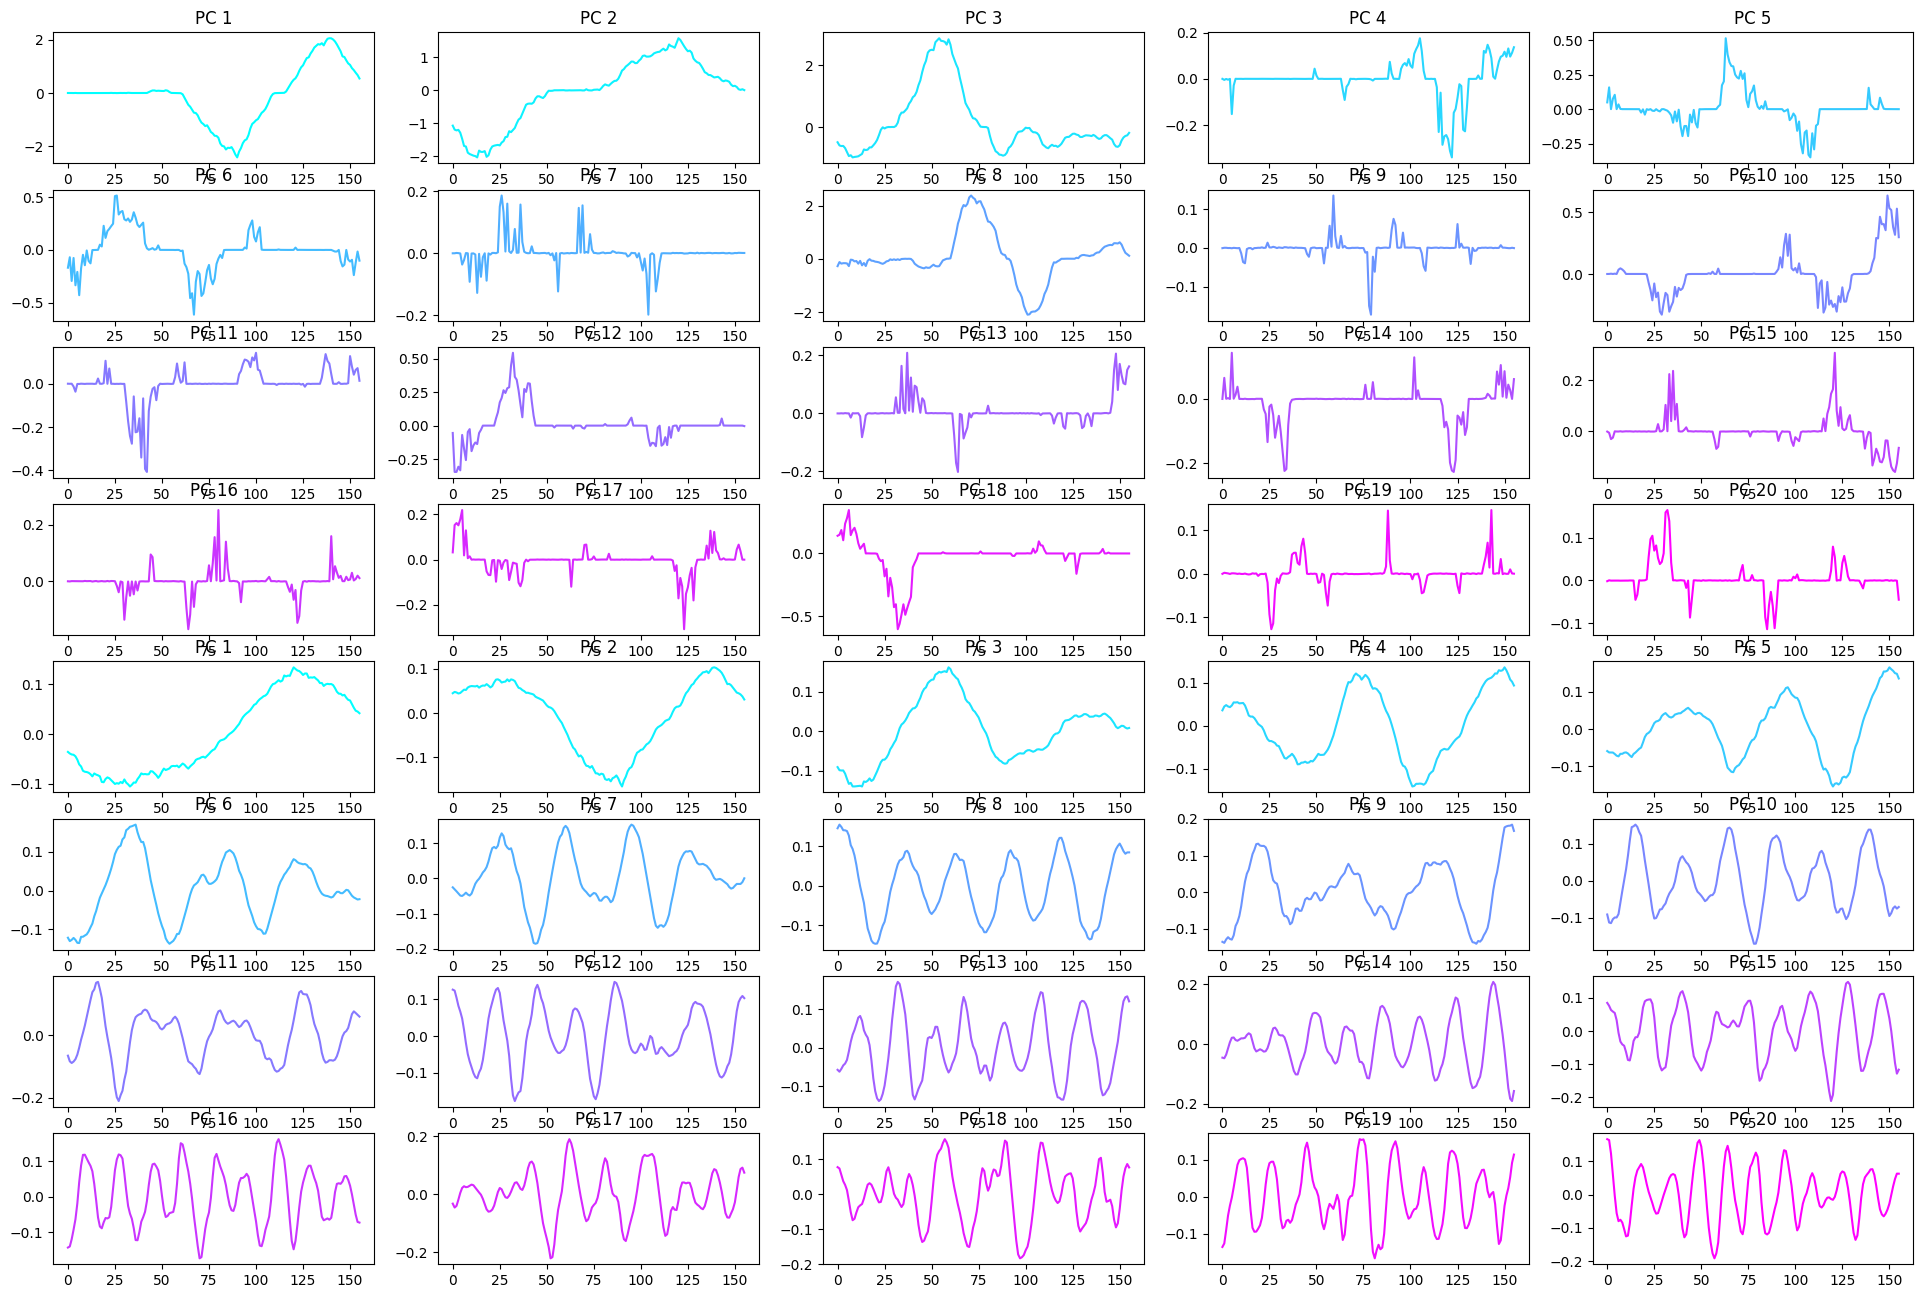

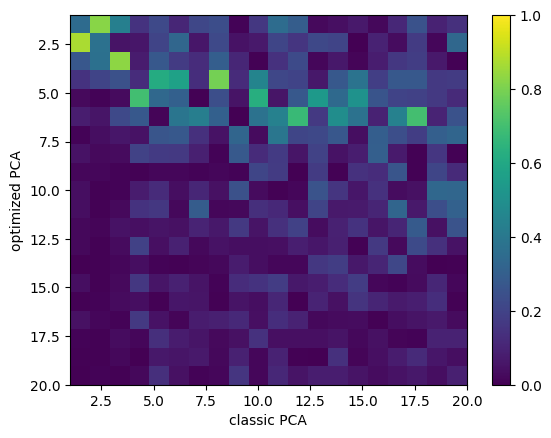

In [10]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:], C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')

In [20]:
%%time
odl = OrthoDictLearning(n_comps=ncomps, alpha1=2, reg='l1', verbose=1)
W = odl.fit_transform(burst_std, y)
C = odl.components_

PC1: iterations=50, error=254.54977861150914
PC2: iterations=50, error=235.624185898179
PC3: iterations=50, error=219.38934851298956
PC4: iterations=50, error=206.55097335980088
PC5: iterations=50, error=196.3949975368401
PC6: iterations=50, error=185.26570574630887
PC7: iterations=50, error=176.89983009881234
PC8: iterations=50, error=170.87847737330316
PC9: iterations=35, error=166.9753728643699
PC10: iterations=50, error=164.35342496299347
PC11: iterations=21, error=160.9237530366621
PC12: iterations=26, error=158.75501183616288
PC13: iterations=41, error=157.24641512896073
PC14: iterations=49, error=155.79344441634873
PC15: iterations=22, error=154.83618307328587
PC16: iterations=50, error=154.46452154802867
PC17: iterations=50, error=154.12348229296103
PC18: iterations=22, error=153.96440524102894
PC19: iterations=50, error=153.42494423413174
PC20: iterations=40, error=153.2882180206752
CPU times: total: 1min 24s
Wall time: 10min 4s


Text(0.5, 1.0, 'Activation matrix of the components')

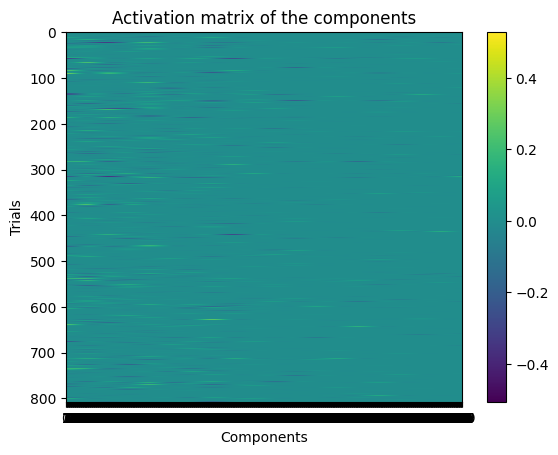

In [17]:
import scipy.ndimage

# Assuming W is your image
zoom_factor = [1, 50]  # 2 times on x-axis, 1 on y-axis (no change)
reverse_idx = np.argsort(idx)

W_dilated = scipy.ndimage.zoom(W[reverse_idx], zoom_factor)

plt.imshow(W_dilated, cmap='viridis', aspect='auto', interpolation='none')
plt.xlabel('Components')
plt.ylabel('Trials')
# Adjust the range of xticks according to the zoom factor
ncomps_dilated = ncomps * zoom_factor[1]
plt.xticks(range(0, ncomps_dilated, 1))
plt.colorbar()
plt.title('Activation matrix of the components')

In [18]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# Assuming X is your features and y is your target
clf = LogisticRegressionCV(cv=5, random_state=0)

scores = cross_val_score(clf, W, y, cv=5)
print(np.mean(y))
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

0.5618811881188119
Cross-validation scores:  [0.5617284  0.5617284  0.56790123 0.58385093 0.55900621]
Average cross-validation score:  0.5668430335097001


Text(0, 0.5, 'optimized PCA')

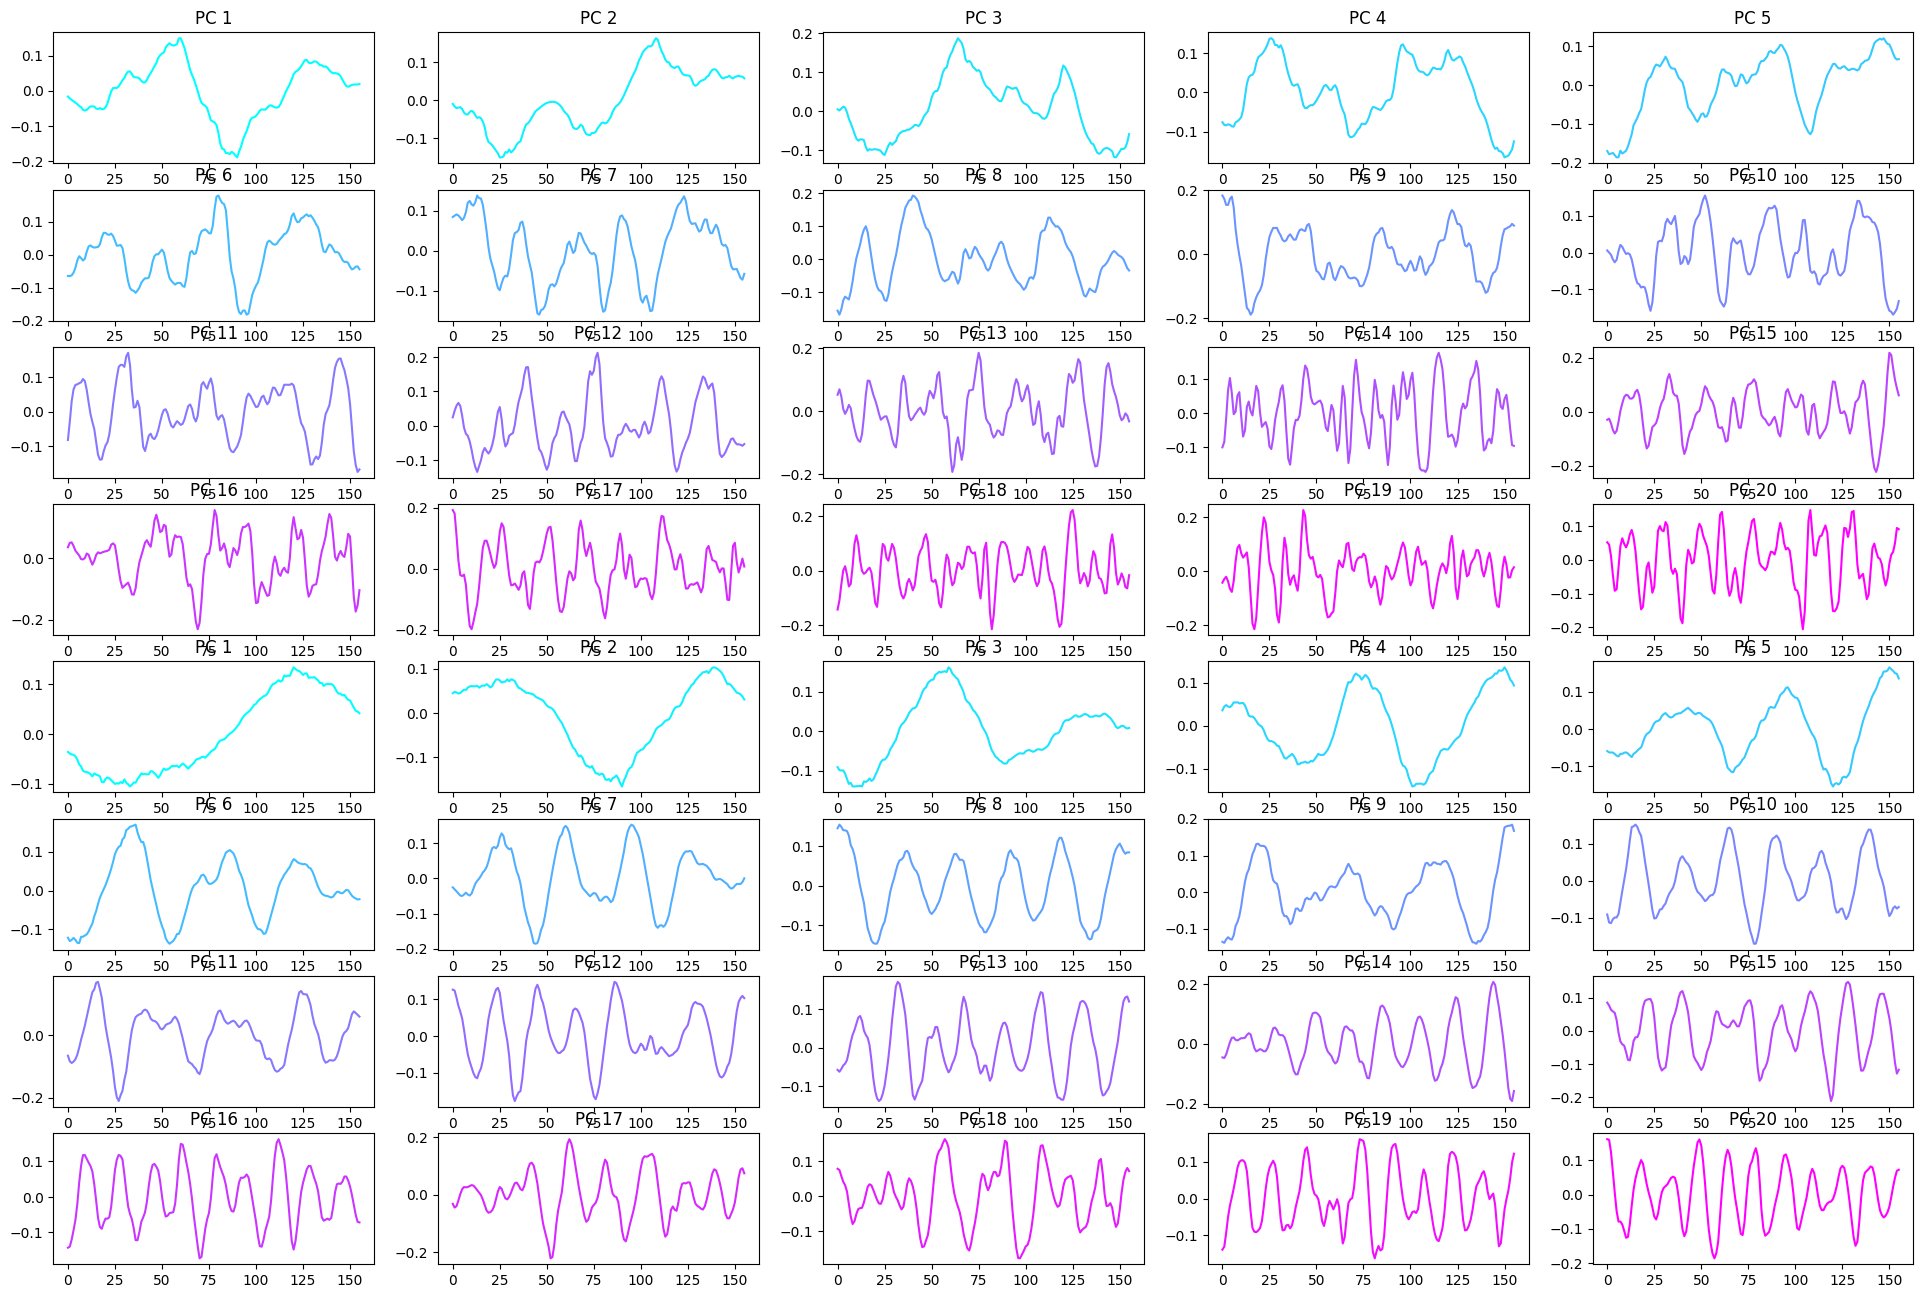

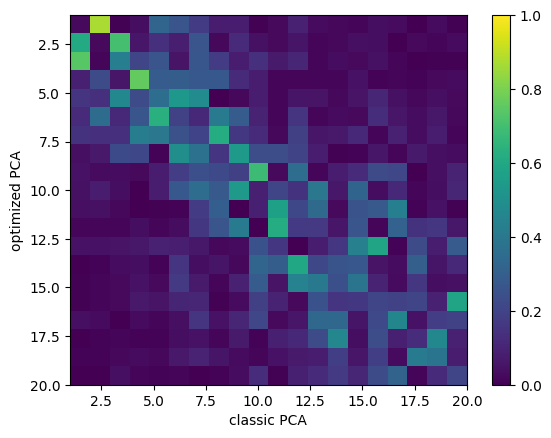

In [19]:
cool_colors = plt.cm.cool(np.linspace(0,1,ncomps))
plt.figure(figsize=(24,16), facecolor='w')
for i in range(ncomps):
    plt.subplot(8,5,i+1)
    plt.plot(C[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
for i in range(ncomps):
    plt.subplot(8,5,ncomps+i+1)
    plt.plot(pca.components_[i,:],color=cool_colors[i])
    plt.title('PC {}'.format((i+1)))
    
corrmat=np.zeros((ncomps,ncomps))
for i in range(ncomps):
    for j in range(ncomps):
        res=pearsonr(pca.components_[i,:], C[j,:])
        corrmat[i,j]=np.abs(res[0])
plt.figure()
ax=plt.subplot(1,1,1)
i1=ax.imshow(corrmat, aspect='auto', origin='upper',
             extent=[1, pcs_to_analyze, pcs_to_analyze, 1], vmin=0, vmax=1)
i1.set_clim([0,1])
plt.colorbar(i1)
ax.set_xlabel('classic PCA')
ax.set_ylabel('optimized PCA')